In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

In [7]:
df = pd.read_csv('./data/data_population.csv', encoding='euc-kr', na_values=[' '])

In [8]:
df.tail()

,Unnamed: 0,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
276,277,경상남도,거창군,63069,27724,2.27,30582,32487,0.94
277,278,경상남도,합천군,48856,24193,2.02,23231,25625,0.91
278,279,제주특별자치도,NaN,615250,251478,2.45,308627,306623,1.01
279,280,제주특별자치도,제주시,454673,182709,2.49,227549,227124,1.00
280,281,제주특별자치도,서귀포시,160577,68769,2.34,81078,79499,1.02


In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)  # 필요없는 컬럼 제거

In [11]:
df.shape

(281, 8)

In [12]:
df.dropna(axis=0, inplace=True)   # 결측치가 있는 데이터 제거

In [13]:
df.shape

(263, 8)

In [14]:
df.head()

,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
1,서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
2,서울특별시,중구,126817,59614,2.13,63292,63525,1.00
3,서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
4,서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
5,서울특별시,광진구,362197,158769,2.28,177946,184251,0.97


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 280
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Province     263 non-null    object 
 1   City         263 non-null    object 
 2   Population   263 non-null    int64  
 3   Households   263 non-null    int64  
 4   PersInHou    263 non-null    float64
 5   Male         263 non-null    int64  
 6   Female       263 non-null    int64  
 7   GenderRatio  263 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 28.5+ KB


In [19]:
df[df.Province=='충청북도'].Population.sum()  # 충청북도 인구수의 합

2414568

In [21]:
df.groupby('Province').Population.sum()  #  도별로 인구수의 합

Province
강원도         1547166
경기도        18723822
경상남도        4428762
경상북도        3215695
광주광역시       1476974
대구광역시       2491137
대전광역시       1525656
부산광역시       3517491
서울특별시      10078850
울산광역시       1169768
인천광역시       2914271
전라남도        1902638
전라북도        2523806
제주특별자치도      615250
충청남도        2671383
충청북도        2414568
Name: Population, dtype: int64

In [23]:
df[(df.Province =='충청남도') | (df.Province=='충청북도')].Population.sum()  # 충청남도와 북도의 인구수의 합

5085951

성비 기준으로 남자가 많고 (GenderRatio>1) 1인 가구가 많은 (PersInHou<2) 도시 :

In [24]:
df2 = df[(df.GenderRatio > 1) & (df.PersInHou < 2)]

In [26]:
genderratio = df2.GenderRatio
cities = df2.City

In [28]:
genderratio

62     1.29
149    1.27
152    1.15
167    1.03
227    1.11
253    1.15
Name: GenderRatio, dtype: float64

In [29]:
cities

62     옹진군 
149    화천군 
152    고성군 
167    괴산군 
227    신안군 
253    울릉군 
Name: City, dtype: object

In [31]:
dfb = pd.DataFrame({'GenderRatio' : list(genderratio)}, index = list(cities))
dfb

,GenderRatio
옹진군,1.29
화천군,1.27
고성군,1.15
괴산군,1.03
신안군,1.11
울릉군,1.15


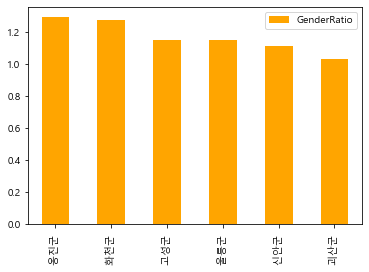

In [34]:
dfb.sort_values(by='GenderRatio', ascending=False).plot.bar(color='orange')   # 값으로 정렬, ascending=False는 내림차순
plt.show()

In [35]:
dfb   #  이렇게 보이면 dataframe

,GenderRatio
옹진군,1.29
화천군,1.27
고성군,1.15
괴산군,1.03
신안군,1.11
울릉군,1.15


In [36]:
genderratio   #  이렇게 보이면 Series

62     1.29
149    1.27
152    1.15
167    1.03
227    1.11
253    1.15
Name: GenderRatio, dtype: float64

In [37]:
cities.values

array(['옹진군 ', '화천군 ', '고성군 ', '괴산군 ', '신안군 ', '울릉군 '], dtype=object)

In [39]:
genderratio.index = cities.values

In [40]:
genderratio

옹진군     1.29
화천군     1.27
고성군     1.15
괴산군     1.03
신안군     1.11
울릉군     1.15
Name: GenderRatio, dtype: float64

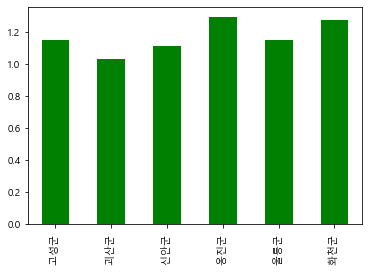

In [41]:
genderratio.sort_index(ascending=True).plot.bar(color='green')   # index로 정렬
plt.show()